# Final Notebook Pt 1: means2work, race/eth, income, nbhooods

**By:** Andrew Williams and Ben Brassette
    
**Description:** This notebook is building on earlier queries of means to work. Purpose is to intergrate and align race/eth and median income data. We are tacking points 1, 3, 4, 5, and 7 in this notebook.

**Expected Outputs**
* Trimmed data high transit areas--use same tracts for trimmed race/eth and median income data
* Descriptive Statistics: Bar graphs of race/eth and income by using high public transit data
* Side by side maps

**Areas Where We Need More Work**
* Spatial Statistics of means2work
* Overlay of rail stops and bus lines
* Descriptive Statistics of Access to Car
* Inclusion of commute time and access to car maps (by high transit query)
* Descriptive Statistics of Jobs
* Interactive Map using some combination of our datasets

**Notes for self to advance project:**
1. Biggest step forward, intergrating our notebooks in the remaining few weeks in a targeted fashion
2.  Overlay heavy rail and light rail stops
3.  Provide more accurate description of the areas through a spatial join
4. Compare with race/ethnicity and income data; we should create some side by side comparisons of transit use and race/eth and income
5. Query "high" transit tracts, cross reference with income and race/eth, potential to add spatial dimension of LA neighborhoods
6. Availability of cars in households
7. Bring a shaprer focus to Central LA and the San Fernando Valley

**TOC**
* Section 2: Library Imports
* Section 3: Mode of Travel
* Section 4: Race/Eth and Income
* Section 5: Public Transit Query
* Section 6: Attribute Merge
* Section 7: Matching Tracts
* Section 8: Graphs
* Section 9: Maps

# Library Import 


Importing various libaries

In [86]:
import urllib.request, json 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

Libraries good to go. 


# Mode of Travel

Import data and run quick analysis of data.I have already cleaned this data and saved it from another notebook (public_transit_query)

In [87]:
means2work = gpd.read_file('Data/Means_Transpo_Work_Tract/acs2019_5yr_B08301_14000US06037185320.geojson')

In [88]:
type(means2work)

geopandas.geodataframe.GeoDataFrame

In [89]:
means2work.shape

(1005, 45)

In [90]:
means2work.head(3)

,geoid,name,B08301001,"B08301001, Error",B08301002,"B08301002, Error",B08301003,"B08301003, Error",B08301004,"B08301004, Error",...,"B08301017, Error",B08301018,"B08301018, Error",B08301019,"B08301019, Error",B08301020,"B08301020, Error",B08301021,"B08301021, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,253.0,1860.0,265.0,1656.0,270.0,204.0,80.0,...,12.0,0.0,12.0,0.0,12.0,26.0,36.0,82.0,52.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,175.0,1730.0,178.0,1617.0,186.0,113.0,91.0,...,12.0,0.0,12.0,10.0,16.0,0.0,12.0,77.0,46.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,438.0,2699.0,411.0,2430.0,356.0,269.0,197.0,...,17.0,0.0,17.0,74.0,65.0,72.0,63.0,129.0,95.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."


In [91]:
means2work.tail(3)

,geoid,name,B08301001,"B08301001, Error",B08301002,"B08301002, Error",B08301003,"B08301003, Error",B08301004,"B08301004, Error",...,"B08301017, Error",B08301018,"B08301018, Error",B08301019,"B08301019, Error",B08301020,"B08301020, Error",B08301021,"B08301021, Error",geometry
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,15.0,26.0,15.0,26.0,0.0,12.0,...,12.0,5.0,7.0,0.0,12.0,4.0,6.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",1964868.0,5629.0,1541762.0,6099.0,1368251.0,6262.0,173511.0,3251.0,...,495.0,18897.0,930.0,67341.0,1930.0,25181.0,1195.0,123270.0,2531.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [92]:
means2work = means2work.drop([1004])

In [93]:
means2work.tail(3)

,geoid,name,B08301001,"B08301001, Error",B08301002,"B08301002, Error",B08301003,"B08301003, Error",B08301004,"B08301004, Error",...,"B08301017, Error",B08301018,"B08301018, Error",B08301019,"B08301019, Error",B08301020,"B08301020, Error",B08301021,"B08301021, Error",geometry
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,15.0,26.0,15.0,26.0,0.0,12.0,...,12.0,5.0,7.0,0.0,12.0,4.0,6.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [94]:
means2work.columns.to_list()

['geoid',
 'name',
 'B08301001',
 'B08301001, Error',
 'B08301002',
 'B08301002, Error',
 'B08301003',
 'B08301003, Error',
 'B08301004',
 'B08301004, Error',
 'B08301005',
 'B08301005, Error',
 'B08301006',
 'B08301006, Error',
 'B08301007',
 'B08301007, Error',
 'B08301008',
 'B08301008, Error',
 'B08301009',
 'B08301009, Error',
 'B08301010',
 'B08301010, Error',
 'B08301011',
 'B08301011, Error',
 'B08301012',
 'B08301012, Error',
 'B08301013',
 'B08301013, Error',
 'B08301014',
 'B08301014, Error',
 'B08301015',
 'B08301015, Error',
 'B08301016',
 'B08301016, Error',
 'B08301017',
 'B08301017, Error',
 'B08301018',
 'B08301018, Error',
 'B08301019',
 'B08301019, Error',
 'B08301020',
 'B08301020, Error',
 'B08301021',
 'B08301021, Error',
 'geometry']

In [95]:
columns_to_keep = ['geoid',
 'name',
 'B08301001',
 'B08301002',
 'B08301003',
 'B08301004',
 'B08301010',
 'B08301011',
 'B08301012',
 'B08301013',
 'B08301014',
 'B08301016',
 'B08301017',
 'B08301018',
 'B08301019',
 'B08301020',
 'B08301021',
 'geometry']

In [96]:
means2work = means2work [columns_to_keep]

In [97]:
means2work.sample()

,geoid,name,B08301001,B08301002,B08301003,B08301004,B08301010,B08301011,B08301012,B08301013,B08301014,B08301016,B08301017,B08301018,B08301019,B08301020,B08301021,geometry
691,14000US06037222700,"Census Tract 2227, Los Angeles, CA",845.0,110.0,100.0,10.0,79.0,79.0,0.0,0.0,0.0,11.0,0.0,52.0,517.0,26.0,50.0,"MULTIPOLYGON (((-118.29154 34.02550, -118.2912..."


In [98]:
#renaming columns
means2work.columns = ['geoid',
 'name',
 'Total',
 'Car, truck, or van',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail, streetcar or trolley',
 'Taxicab',
 'Motorcycle',
 'Bicycle',
 'Walked',
 'Other means',
 'Worked from home',
 'geometry']

In [99]:
means2work.sample()

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,"Light rail, streetcar or trolley",Taxicab,Motorcycle,Bicycle,Walked,Other means,Worked from home,geometry
830,14000US06037262302,"Census Tract 2623.02, Los Angeles, CA",1262.0,1024.0,1013.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,62.0,162.0,"MULTIPOLYGON (((-118.48844 34.08084, -118.4884..."


In [100]:
means2work['Percent Car, truck, or van'] = means2work['Car, truck, or van']/means2work['Total']*100
means2work['Percent Drove alone'] = means2work['Drove alone']/means2work['Total']*100
means2work['Percent Carpooled'] = means2work['Carpooled']/means2work['Total']*100
means2work['Percent Public transportation'] = means2work['Public transportation']/means2work['Total']*100
means2work['Percent Bus'] = means2work['Bus']/means2work['Total']*100
means2work['Percent Subway or elevated il'] = means2work['Subway or elevated il']/means2work['Total']*100
means2work['Percent Long-distance train or commuter rail'] = means2work['Long-distance train or commuter rail']/means2work['Total']*100
means2work['Percent Light rail, streetcar or trolley'] = means2work['Light rail, streetcar or trolley']/means2work['Total']*100
means2work['Percent Taxicab'] = means2work['Taxicab']/means2work['Total']*100
means2work['Percent Motorcycle'] = means2work['Motorcycle']/means2work['Total']*100
means2work['Percent Bicycle'] = means2work['Bicycle']/means2work['Total']*100
means2work['Percent Walked'] = means2work['Walked']/means2work['Total']*100
means2work['Percent Other means'] = means2work['Other means']/means2work['Total']*100
means2work['Percent Worked from home'] = means2work['Worked from home']/means2work['Total']*100

In [101]:
means2work.sample()

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Taxicab,Percent Motorcycle,Percent Bicycle,Percent Walked,Percent Other means,Percent Worked from home
448,14000US06037192410,"Census Tract 1924.10, Los Angeles, CA",2236.0,1758.0,1670.0,88.0,158.0,158.0,0.0,0.0,...,7.06619,0.0,0.0,0.0,0.0,0.0,0.805009,2.012522,0.313059,11.18068


# Race and Ethnicity Data for LA

## Load Census data

I will load one Census data table:

Table B03002: Hispanic or Latino Origin by Race

In [102]:
# loading the three data files
gdf_race = gpd.read_file('Data/race/acs2019_5yr_B03002_raceethnicity.geojson')

## Begin to look at the data


In [103]:
gdf_race.shape

(1005, 45)

There are 1005 rows of data, referencing the 1005 census tracts in LA. There are 45 race and ethnicity variables.

Checking to see if any data needs to be dropped.

In [104]:
gdf_race.head(4)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,...,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,...,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3731.0,465.0,2986.0,435.0,198.0,165.0,...,17.0,874.0,477.0,81.0,80.0,48.0,62.0,33.0,51.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2338.0,236.0,1812.0,271.0,87.0,107.0,...,12.0,497.0,231.0,45.0,42.0,11.0,18.0,34.0,39.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [105]:
gdf_race.tail(4)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1175.0,178.0,788.0,161.0,393.0,108.0,232.0,97.0,...,12.0,73.0,34.0,32.0,34.0,27.0,34.0,5.0,7.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",3966936.0,82.0,2044527.0,6867.0,1129956.0,5063.0,341750.0,4634.0,...,393.0,887733.0,10522.0,57007.0,2772.0,31599.0,1957.0,25408.0,1709.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


Need top drop the last row

In [106]:
gdf_race = gdf_race.drop([1004])

In [107]:
gdf_race.tail(3)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1175.0,178.0,788.0,161.0,393.0,108.0,232.0,97.0,...,12.0,73.0,34.0,32.0,34.0,27.0,34.0,5.0,7.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


Drop sucessful

In [108]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002010',
 'B03002011',
 'B03002012',
 'B03002013',
 'B03002014',
 'B03002015',
 'B03002016',
 'B03002017',
 'B03002018',
 'B03002019',
 'B03002020',
 'B03002021',
 'geometry']

In [109]:
# redefine gdf with only columns to keep
gdf_race = gdf_race[columns_to_keep]

This removes any variables that we do not need.

In [110]:
# check the slimmed down gdf
gdf_race.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,...,B03002013,B03002014,B03002015,B03002016,B03002017,B03002018,B03002019,B03002020,B03002021,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,...,731.0,0.0,0.0,0.0,0.0,383.0,74.0,34.0,40.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,...,99.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,...,1661.0,0.0,0.0,0.0,0.0,874.0,81.0,48.0,33.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,...,822.0,0.0,0.0,0.0,0.0,497.0,45.0,11.0,34.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,...,224.0,0.0,0.0,0.0,0.0,45.0,28.0,28.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


We can run the .head command to see our first five lines of data and to make sure our varaibles were deleted. Next we will redefine the columns to match the variable names.

In [111]:
gdf_race.columns = ['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native Hawaiian',
 'N_Some other race alone',
 'N_Two or more races',
 'N_Two races including some other race',
 'N_Two races excluding some other race, and three or more races',
 'Hispanic or Latino',
 'H_White',
 'H_Black',
 'H_Native',
 'H_Asian',
 'H_Native Hawaiian',
 'H_Some other race alone',
 'H_Two or more races',
 'H_Two races including some other race',
 'H_Two races excluding some other race, and three or more races',
 'geometry']

In [112]:
gdf_race.head()

,geoid,name,Total,Not Hispanic or Latino,N_White,N_Black,N_Native,N_Asian,N_Native Hawaiian,N_Some other race alone,...,H_White,H_Black,H_Native,H_Asian,H_Native Hawaiian,H_Some other race alone,H_Two or more races,H_Two races including some other race,"H_Two races excluding some other race, and three or more races",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,...,731.0,0.0,0.0,0.0,0.0,383.0,74.0,34.0,40.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,...,99.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,...,1661.0,0.0,0.0,0.0,0.0,874.0,81.0,48.0,33.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,...,822.0,0.0,0.0,0.0,0.0,497.0,45.0,11.0,34.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,...,224.0,0.0,0.0,0.0,0.0,45.0,28.0,28.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


See, it worked! Next we create percentage variables.

In [113]:
gdf_race['N_WhitePercentage']=round(((gdf_race['N_White']/ gdf_race['Total'])*100),2)
gdf_race['N_BlacPercentage']=round(((gdf_race['N_Black']/ gdf_race['Total'])*100),2)
gdf_race['N_NativePercentage']=round(((gdf_race['N_Native']/ gdf_race['Total'])*100),2)
gdf_race['N_AsianPercentage']=round(((gdf_race['N_Asian']/ gdf_race['Total'])*100),2)
gdf_race['N_HawaiianPercentage']=round(((gdf_race['N_Native Hawaiian']/ gdf_race['Total'])*100),2)
gdf_race['N_OtherPercentage']=round(((gdf_race['N_Some other race alone']/ gdf_race['Total'])*100),2)
gdf_race['N_TwoPlusPercentage']=round(((gdf_race['N_Two or more races']/ gdf_race['Total'])*100),2)
gdf_race['N_TwoInclOtherPercentage']=round(((gdf_race['N_Two races including some other race']/ gdf_race['Total'])*100),2)
gdf_race['N_TwoPlusThreePlusPercentage']=round(((gdf_race['N_Two races excluding some other race, and three or more races']/ gdf_race['Total'])*100),2)
gdf_race['HispanicPercentage']=round(((gdf_race['Hispanic or Latino']/ gdf_race['Total'])*100),2)
gdf_race['H_WhitePercentage']=round(((gdf_race['H_White']/ gdf_race['Total'])*100),2)
gdf_race['H_BlacPercentage']=round(((gdf_race['H_Black']/ gdf_race['Total'])*100),2)
gdf_race['H_NativePercentage']=round(((gdf_race['H_Native']/ gdf_race['Total'])*100),2)
gdf_race['H_AsianPercentage']=round(((gdf_race['H_Asian']/ gdf_race['Total'])*100),2)
gdf_race['H_HawaiianPercentage']=round(((gdf_race['H_Native Hawaiian']/ gdf_race['Total'])*100),2)
gdf_race['H_OtherPercentage']=round(((gdf_race['H_Some other race alone']/ gdf_race['Total'])*100),2)
gdf_race['H_TwoPlusPercentage']=round(((gdf_race['H_Two or more races']/ gdf_race['Total'])*100),2)
gdf_race['H_TwoInclOtherPercentage']=round(((gdf_race['H_Two races including some other race']/ gdf_race['Total'])*100),2)
gdf_race['H_TwoPlusThreePlusPercentage']=round(((gdf_race['H_Two races excluding some other race, and three or more races']/ gdf_race['Total'])*100),2)


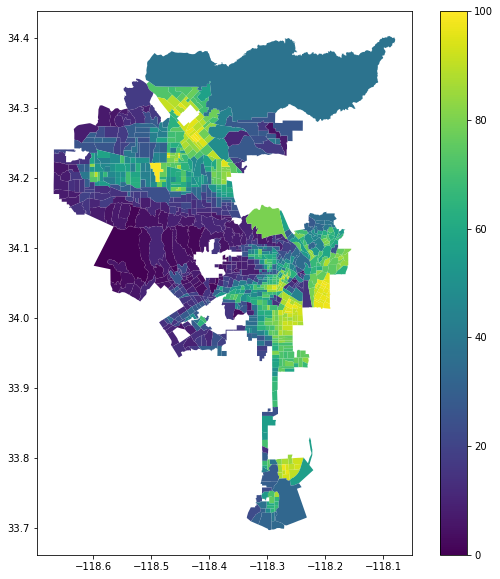

In [114]:
gdf_race.head(1004).plot(figsize=(10,10),column='HispanicPercentage',legend=True)

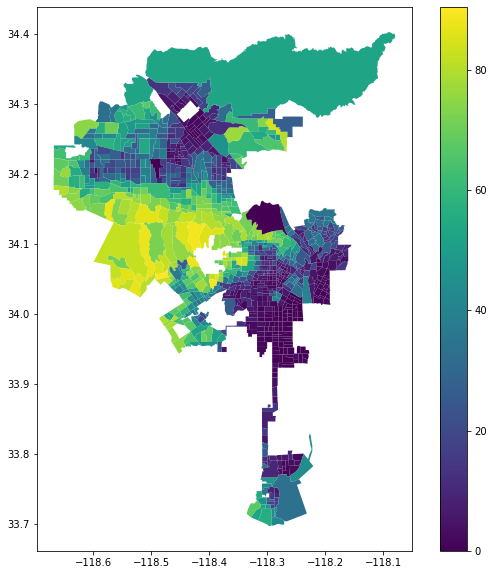

In [115]:
gdf_race.head(1004).plot(figsize=(10,10),column='N_WhitePercentage',legend=True)

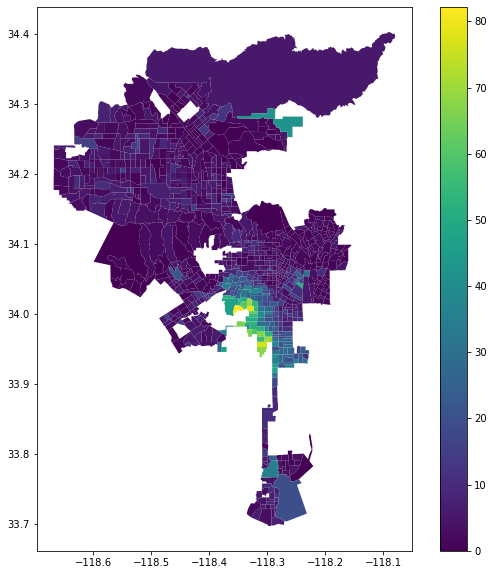

In [116]:
gdf_race.head(1004).plot(figsize=(10,10),column='N_BlacPercentage',legend=True)

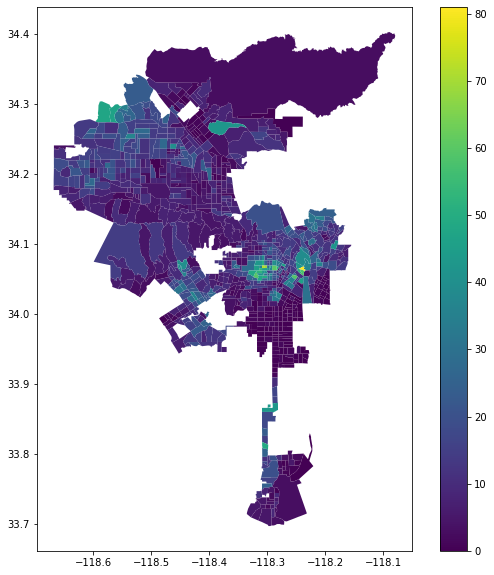

In [117]:
gdf_race.head(1004).plot(figsize=(10,10),column='N_AsianPercentage',legend=True)

This graph shows the number of non-hispanic white people in LA.

This map shows the distribution on non-hispanic Black people in LA.

Text(0.5, 1.0, 'Hispanic Population')

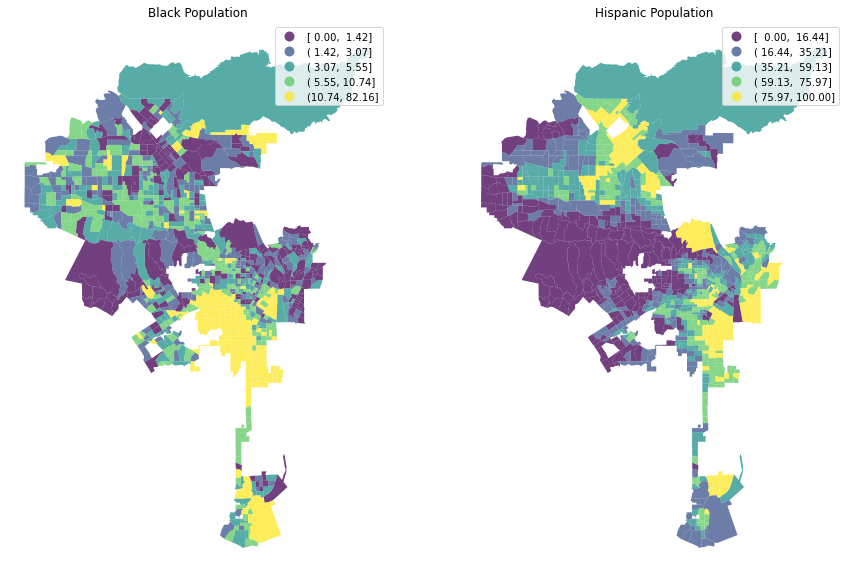

In [118]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf_race.plot(column='N_BlacPercentage', 
            cmap='viridis', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Black Population")

# spatial lag map on the right
gdf_race.plot(column='HispanicPercentage', 
            cmap='viridis', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Hispanic Population")

This map shows the concentration of non-hispanic Black people in LA and Hispanic people in LA, respectively. 

# Income in Los Angeles

Our group project is a comparison of accessibility and mobility in Los Angeles neighborhoods. We seek to understand who uses transit in LA, and how certain impacts land use or the transportation system may impact their lives. We will be using data from the American Community Survey, LA Metro, the City of LA, LA Times, and the Bureau of Transportation Statistics.

## Load Census data

I will load one Census data table:

Table B19013: Median Household Income in the Last 12 Months

In [119]:
# loading the data file

gdf_income = gpd.read_file('Data/income/acs2019_5yr_B19013_income.geojson')

## Begin to look at the data

In [120]:
gdf_income.shape

(1005, 5)

In [121]:
gdf_income.tail(3)

,geoid,name,B19013001,"B19013001, Error",geometry
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",62142.0,452.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


There are 1,005 rows of data which represent the 1,004 census tracts in the city of LA. There are 5 columns which will be discussed later.

In [122]:
gdf_income = gdf_income.drop([1004])

In [123]:
gdf_income.tail()

,geoid,name,B19013001,"B19013001, Error",geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",150250.0,13582.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


We use the .head command to get a look at the first 5 lines of data. The columns are: geoid (geographic pinpoint of the tract), name (number identification of the census tract), B19013001 and B19013001, error which I discuss below, and the geometry which is that latitude and longitudinal coordinates. 

Since we do not want a column that has "error" in the name, we remove it by defining which columns to keep. 

In [124]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B19013001',
 'geometry']

In [125]:
# redefine gdf with only columns to keep
gdf_income = gdf_income[columns_to_keep]

In [126]:
# check the slimmed down gdf
gdf_income.head()

,geoid,name,B19013001,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


The dataframe is now reduced to show only the columns we identified, but we still need to rename B19013001. We use the documentation from the dataset to know that this is the variable for median income. 

In [127]:
gdf_income.columns = ['geoid',
 'name',
 'Median Income',
 'geometry']

In [128]:
gdf_income.head()

,geoid,name,Median Income,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


## Now that we have our data fixed, it's time to make some graphs!

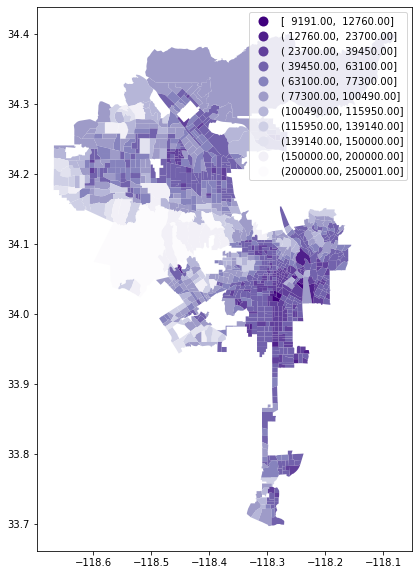

In [129]:
gdf_income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='UserDefined', cmap='Purples_r',
               classification_kwds=dict(bins=[12760,23700,39450,63100,77300,100490,115950,139140,150000,200000])
               )

This map shows the median income by census tract across LA.

Text(0.5, 1.0, 'Median Income')

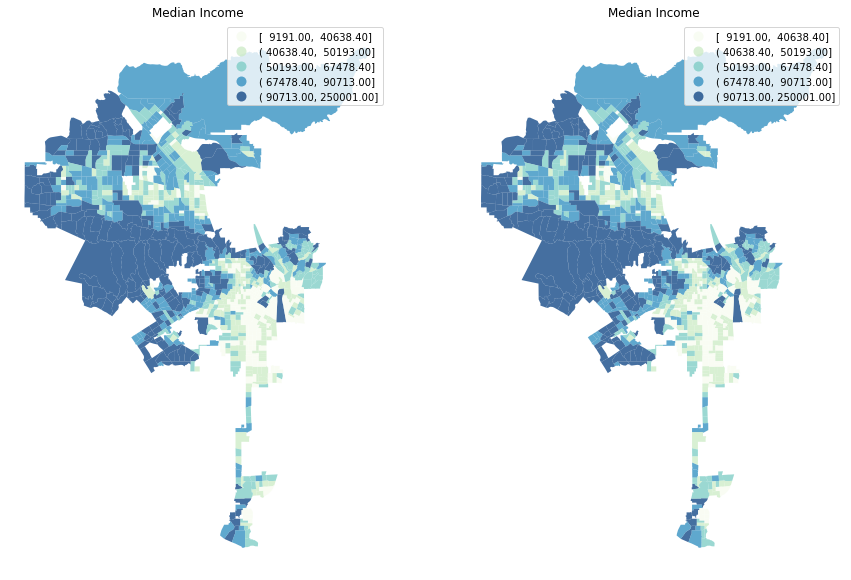

In [130]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf_income.plot(column='Median Income', 
            cmap='GnBu', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Median Income")

# spatial lag map on the right
gdf_income.plot(column='Median Income', 
            cmap='GnBu', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Median Income")

# Query for Relative High Transit Areas

## Quick Survey of High Use Transit Areas

In [131]:
transit_indicators = ['Percent Public transportation',
'Percent Bus',
'Percent Subway or elevated il',
'Percent Long-distance train or commuter rail',
'Percent Light rail, streetcar or trolley',]

In [132]:
for indicator in transit_indicators:
    print(indicator)
    print (means2work.sort_values(by = indicator, ascending=False)[indicator].head(10))

Percent Public transportation
569    69.580892
560    58.119080
562    56.913828
536    52.588235
563    51.786311
599    49.544863
570    49.211356
561    48.280310
564    47.912773
548    45.732255
Name: Percent Public transportation, dtype: float64
Percent Bus
569    68.048671
560    56.562923
562    56.362725
536    52.588235
563    49.682805
564    47.663551
599    47.074122
570    46.161935
548    45.732255
557    42.293465
Name: Percent Bus, dtype: float64
Percent Subway or elevated il
531    20.088300
418    10.240113
489     8.043876
453     7.094972
605     7.062476
369     6.644951
535     6.615925
203     6.456572
540     6.451613
359     6.376689
Name: Percent Subway or elevated il, dtype: float64
Percent Long-distance train or commuter rail
762    9.416725
729    4.793171
763    4.505170
597    3.832117
18     3.149100
661    3.076923
535    2.810304
817    2.404526
44     2.235846
81     2.209705
Name: Percent Long-distance train or commuter rail, dtype: float64
Percent 

I don't know how to call two variables at the same time in my search-- I also want corresponding GEOIDs for my tracts. Will just query below to get the results I need, even if inefficently.

## Digging deeper into Public Transportation

In [133]:
means2work_sorted_pt = means2work.sort_values(by='Percent Public transportation',ascending = False)

In [134]:
means2work_sorted_pt[['geoid','Percent Public transportation']].head(105)

,geoid,Percent Public transportation
569,14000US06037209402,69.580892
560,14000US06037208902,58.119080
562,14000US06037208904,56.913828
536,14000US06037206300,52.588235
563,14000US06037209102,51.786311
...,...,...
535,14000US06037206200,20.608899
133,14000US06037119340,20.554017
146,14000US06037120106,20.306691
552,14000US06037208501,20.047923


In [135]:
means2work_sorted_pt[means2work_sorted_pt['Percent Public transportation'] > 20]

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Taxicab,Percent Motorcycle,Percent Bicycle,Percent Walked,Percent Other means,Percent Worked from home
569,14000US06037209402,"Census Tract 2094.02, Los Angeles, CA",2219.0,453.0,226.0,227.0,1544.0,1510.0,0.0,0.0,...,68.048671,0.000000,0.000000,1.532222,0.000000,0.000000,1.261830,5.543037,1.622352,1.577287
560,14000US06037208902,"Census Tract 2089.02, Los Angeles, CA",1478.0,379.0,243.0,136.0,859.0,836.0,23.0,0.0,...,56.562923,1.556157,0.000000,0.000000,0.000000,0.000000,3.179973,11.231394,0.270636,1.556157
562,14000US06037208904,"Census Tract 2089.04, Los Angeles, CA",1996.0,467.0,363.0,104.0,1136.0,1125.0,0.0,11.0,...,56.362725,0.000000,0.551102,0.000000,0.000000,0.000000,7.014028,6.963928,2.254509,3.456914
536,14000US06037206300,"Census Tract 2063, Los Angeles, CA",850.0,131.0,100.0,31.0,447.0,447.0,0.0,0.0,...,52.588235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.411765,0.117647,6.470588
563,14000US06037209102,"Census Tract 2091.02, Los Angeles, CA",2995.0,1148.0,1071.0,77.0,1551.0,1488.0,58.0,5.0,...,49.682805,1.936561,0.166945,0.000000,0.000000,0.000000,1.368948,5.843072,0.467446,2.203673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,14000US06037206200,"Census Tract 2062, Los Angeles, CA",1708.0,947.0,898.0,49.0,352.0,177.0,113.0,48.0,...,10.362998,6.615925,2.810304,0.819672,0.000000,0.000000,0.000000,14.637002,1.229508,8.079625
133,14000US06037119340,"Census Tract 1193.40, Los Angeles, CA",1805.0,1203.0,953.0,250.0,371.0,367.0,4.0,0.0,...,20.332410,0.221607,0.000000,0.000000,2.049861,0.720222,0.000000,5.540166,2.603878,1.883657
146,14000US06037120106,"Census Tract 1201.06, Los Angeles, CA",2152.0,1476.0,1231.0,245.0,437.0,437.0,0.0,0.0,...,20.306691,0.000000,0.000000,0.000000,2.648699,0.000000,0.000000,5.669145,0.278810,2.509294
552,14000US06037208501,"Census Tract 2085.01, Los Angeles, CA",1252.0,815.0,719.0,96.0,251.0,251.0,0.0,0.0,...,20.047923,0.000000,0.000000,0.000000,0.000000,0.000000,0.559105,7.987220,1.837061,4.472843


## Bus

In [136]:
means2work_sorted_bus = means2work.sort_values(by='Percent Bus',ascending = False)

In [137]:
means2work_sorted_bus[['geoid','Percent Bus']].head(10)

,geoid,Percent Bus
569,14000US06037209402,68.048671
560,14000US06037208902,56.562923
562,14000US06037208904,56.362725
536,14000US06037206300,52.588235
563,14000US06037209102,49.682805
564,14000US06037209103,47.663551
599,14000US06037212203,47.074122
570,14000US06037209403,46.161935
548,14000US06037208301,45.732255
557,14000US06037208720,42.293465


In [138]:
means2work_sorted_bus[means2work_sorted_bus['Percent Bus'] > 20]

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Taxicab,Percent Motorcycle,Percent Bicycle,Percent Walked,Percent Other means,Percent Worked from home
569,14000US06037209402,"Census Tract 2094.02, Los Angeles, CA",2219.0,453.0,226.0,227.0,1544.0,1510.0,0.0,0.0,...,68.048671,0.000000,0.000000,1.532222,0.000000,0.000000,1.261830,5.543037,1.622352,1.577287
560,14000US06037208902,"Census Tract 2089.02, Los Angeles, CA",1478.0,379.0,243.0,136.0,859.0,836.0,23.0,0.0,...,56.562923,1.556157,0.000000,0.000000,0.000000,0.000000,3.179973,11.231394,0.270636,1.556157
562,14000US06037208904,"Census Tract 2089.04, Los Angeles, CA",1996.0,467.0,363.0,104.0,1136.0,1125.0,0.0,11.0,...,56.362725,0.000000,0.551102,0.000000,0.000000,0.000000,7.014028,6.963928,2.254509,3.456914
536,14000US06037206300,"Census Tract 2063, Los Angeles, CA",850.0,131.0,100.0,31.0,447.0,447.0,0.0,0.0,...,52.588235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.411765,0.117647,6.470588
563,14000US06037209102,"Census Tract 2091.02, Los Angeles, CA",2995.0,1148.0,1071.0,77.0,1551.0,1488.0,58.0,5.0,...,49.682805,1.936561,0.166945,0.000000,0.000000,0.000000,1.368948,5.843072,0.467446,2.203673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,14000US06037191500,"Census Tract 1915, Los Angeles, CA",3330.0,2229.0,1985.0,244.0,758.0,679.0,79.0,0.0,...,20.390390,2.372372,0.000000,0.000000,0.000000,0.000000,2.612613,3.813814,0.000000,3.873874
133,14000US06037119340,"Census Tract 1193.40, Los Angeles, CA",1805.0,1203.0,953.0,250.0,371.0,367.0,4.0,0.0,...,20.332410,0.221607,0.000000,0.000000,2.049861,0.720222,0.000000,5.540166,2.603878,1.883657
146,14000US06037120106,"Census Tract 1201.06, Los Angeles, CA",2152.0,1476.0,1231.0,245.0,437.0,437.0,0.0,0.0,...,20.306691,0.000000,0.000000,0.000000,2.648699,0.000000,0.000000,5.669145,0.278810,2.509294
682,14000US06037221810,"Census Tract 2218.10, Los Angeles, CA",1116.0,591.0,486.0,105.0,238.0,226.0,12.0,0.0,...,20.250896,1.075269,0.000000,0.000000,0.000000,0.000000,5.555556,15.053763,0.358423,4.749104


## Subway

In [139]:
means2work_sorted_sub = means2work.sort_values(by='Percent Subway or elevated il',ascending = False)

In [140]:
means2work_sorted_sub[['geoid','Percent Subway or elevated il']].head(10)

,geoid,Percent Subway or elevated il
531,14000US06037206020,20.088300
418,14000US06037190402,10.240113
489,14000US06037199300,8.043876
453,14000US06037192620,7.094972
605,14000US06037212410,7.062476
369,14000US06037183610,6.644951
535,14000US06037206200,6.615925
203,14000US06037124902,6.456572
540,14000US06037207301,6.451613
359,14000US06037183103,6.376689


In [141]:
means2work_sorted_sub[means2work_sorted_sub['Percent Subway or elevated il'] > 5]

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Taxicab,Percent Motorcycle,Percent Bicycle,Percent Walked,Percent Other means,Percent Worked from home
531,14000US06037206020,"Census Tract 2060.20, Los Angeles, CA",453.0,297.0,265.0,32.0,115.0,24.0,91.0,0.0,...,5.298013,20.088300,0.000000,0.000000,0.000000,0.000000,0.000000,0.883002,2.428256,5.739514
418,14000US06037190402,"Census Tract 1904.02, Los Angeles, CA",1416.0,884.0,781.0,103.0,338.0,174.0,145.0,0.0,...,12.288136,10.240113,0.000000,1.341808,0.494350,0.000000,1.977401,1.271186,0.000000,9.957627
489,14000US06037199300,"Census Tract 1993, Los Angeles, CA",2188.0,1511.0,1406.0,105.0,374.0,198.0,176.0,0.0,...,9.049360,8.043876,0.000000,0.000000,0.000000,0.000000,0.868373,3.382084,1.051188,8.546618
453,14000US06037192620,"Census Tract 1926.20, Los Angeles, CA",1790.0,1090.0,1033.0,57.0,579.0,452.0,127.0,0.0,...,25.251397,7.094972,0.000000,0.000000,0.000000,0.000000,0.000000,2.793296,2.011173,1.955307
605,14000US06037212410,"Census Tract 2124.10, Los Angeles, CA",2577.0,1303.0,1174.0,129.0,948.0,766.0,182.0,0.0,...,29.724486,7.062476,0.000000,0.000000,0.000000,0.000000,1.823826,5.510283,0.426853,4.889406
369,14000US06037183610,"Census Tract 1836.10, Los Angeles, CA",1535.0,1180.0,1008.0,172.0,196.0,68.0,102.0,26.0,...,4.429967,6.644951,1.693811,0.000000,0.000000,0.000000,0.390879,3.778502,0.977199,5.211726
535,14000US06037206200,"Census Tract 2062, Los Angeles, CA",1708.0,947.0,898.0,49.0,352.0,177.0,113.0,48.0,...,10.362998,6.615925,2.810304,0.819672,0.000000,0.000000,0.000000,14.637002,1.229508,8.079625
203,14000US06037124902,"Census Tract 1249.02, Los Angeles, CA",1301.0,1065.0,969.0,96.0,166.0,82.0,84.0,0.0,...,6.302844,6.456572,0.000000,0.000000,0.000000,0.000000,0.538048,1.537279,0.000000,3.305150
540,14000US06037207301,"Census Tract 2073.01, Los Angeles, CA",3224.0,1168.0,1138.0,30.0,758.0,534.0,208.0,16.0,...,16.563275,6.451613,0.496278,0.000000,1.209677,0.000000,0.310174,17.431762,2.853598,18.455335
359,14000US06037183103,"Census Tract 1831.03, Los Angeles, CA",2368.0,1810.0,1520.0,290.0,427.0,257.0,151.0,19.0,...,10.853041,6.376689,0.802365,0.000000,0.000000,0.000000,0.886824,0.844595,0.000000,3.800676


## Distance Rail

In [142]:
means2work_sorted_commuter = means2work.sort_values(by='Percent Long-distance train or commuter rail',ascending = False)

In [143]:
means2work_sorted_commuter[['geoid','Percent Long-distance train or commuter rail']].head(10)

,geoid,Percent Long-distance train or commuter rail
762,14000US06037236203,9.416725
729,14000US06037231300,4.793171
763,14000US06037236204,4.505170
597,14000US06037212102,3.832117
18,14000US06037104124,3.149100
661,14000US06037219300,3.076923
535,14000US06037206200,2.810304
817,14000US06037242100,2.404526
44,14000US06037106406,2.235846
81,14000US06037111206,2.209705


## Light Rail

In [144]:
means2work_sorted_lr = means2work.sort_values(by='Percent Light rail, streetcar or trolley',ascending = False)

In [145]:
means2work_sorted_lr[['geoid','Percent Light rail, streetcar or trolley']].head(10)

,geoid,"Percent Light rail, streetcar or trolley"
371,14000US06037183701,8.559964
372,14000US06037183702,4.969778
820,14000US06037242600,2.679275
759,14000US06037236000,2.613790
561,14000US06037208903,2.450559
795,14000US06037239801,2.154882
819,14000US06037242300,2.149837
735,14000US06037231800,2.038320
882,14000US06037269906,2.008547
717,14000US06037228710,1.996008


# Attribute Merge

## Means to work and Neighborhood

Importing My previous file with geoids and neigborhoods names and data background check

In [146]:
df_slim = pd.read_csv('slim_full.csv')

In [147]:
type(df_slim)

pandas.core.frame.DataFrame

In [148]:
df_slim.head(4)

,geoid,Name_1
0,14000US06037101110,Tujunga
1,14000US06037101122,Tujunga
2,14000US06037101210,Tujunga
3,14000US06037101220,Tujunga


In [149]:
df_slim['Name_1'].value_counts()

Koreatown               30
Westlake                29
Van Nuys                27
Boyle Heights           25
Hollywood               22
                        ..
Beverlywood              1
Chatsworth Reservoir     1
Hansen Dam               1
Harvard Park             1
No Neighborhood          1
Name: Name_1, Length: 119, dtype: int64

In [150]:
df_slim.shape

(1004, 2)

Info is good to go

Starting process of merge, but quick sample of means2work data

In [151]:
means2work.head(2)

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Taxicab,Percent Motorcycle,Percent Bicycle,Percent Walked,Percent Other means,Percent Worked from home
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,1860.0,1656.0,204.0,59.0,36.0,23.0,0.0,...,1.776024,1.134682,0.0,0.0,0.000000,0.0,0.0,0.000000,1.282684,4.045387
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,1730.0,1617.0,113.0,9.0,0.0,9.0,0.0,...,0.000000,0.490731,0.0,0.0,0.436205,0.0,0.0,0.545256,0.000000,4.198473


In [152]:
m2w_nbh=means2work.merge(df_slim, on='geoid')

In [153]:
m2w_nbh.head()

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Taxicab,Percent Motorcycle,Percent Bicycle,Percent Walked,Percent Other means,Percent Worked from home,Name_1
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,1860.0,1656.0,204.0,59.0,36.0,23.0,0.0,...,1.134682,0.0,0.0,0.000000,0.0,0.0,0.000000,1.282684,4.045387,Tujunga
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,1730.0,1617.0,113.0,9.0,0.0,9.0,0.0,...,0.490731,0.0,0.0,0.436205,0.0,0.0,0.545256,0.000000,4.198473,Tujunga
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,2699.0,2430.0,269.0,68.0,68.0,0.0,0.0,...,0.000000,0.0,0.0,0.490677,0.0,0.0,2.420674,2.355250,4.219823,Tujunga
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,1439.0,1323.0,116.0,48.0,48.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.502197,1.883239,4.268675,Tujunga
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1782.0,1538.0,1457.0,81.0,26.0,26.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,12.233446,Tujunga


In [154]:
type(m2w_nbh)

geopandas.geodataframe.GeoDataFrame

In [155]:
m2w_nbh.shape

(1004, 33)

In [156]:
m2w_nbh.dtypes

geoid                                             object
name                                              object
Total                                            float64
Car, truck, or van                               float64
Drove alone                                      float64
Carpooled                                        float64
Public transportation                            float64
Bus                                              float64
Subway or elevated il                            float64
Long-distance train or commuter rail             float64
Light rail, streetcar or trolley                 float64
Taxicab                                          float64
Motorcycle                                       float64
Bicycle                                          float64
Walked                                           float64
Other means                                      float64
Worked from home                                 float64
geometry                       

In [157]:
m2w_nbh.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1004 entries, 0 to 1003
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   geoid                                         1004 non-null   object  
 1   name                                          1004 non-null   object  
 2   Total                                         1004 non-null   float64 
 3   Car, truck, or van                            1004 non-null   float64 
 4   Drove alone                                   1004 non-null   float64 
 5   Carpooled                                     1004 non-null   float64 
 6   Public transportation                         1004 non-null   float64 
 7   Bus                                           1004 non-null   float64 
 8   Subway or elevated il                         1004 non-null   float64 
 9   Long-distance train or commuter rail        

In [158]:
m2w_nbh.columns.to_list()

['geoid',
 'name',
 'Total',
 'Car, truck, or van',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail, streetcar or trolley',
 'Taxicab',
 'Motorcycle',
 'Bicycle',
 'Walked',
 'Other means',
 'Worked from home',
 'geometry',
 'Percent Car, truck, or van',
 'Percent Drove alone',
 'Percent Carpooled',
 'Percent Public transportation',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail, streetcar or trolley',
 'Percent Taxicab',
 'Percent Motorcycle',
 'Percent Bicycle',
 'Percent Walked',
 'Percent Other means',
 'Percent Worked from home',
 'Name_1']

Success! I do want to cut a couple columns. 

In [159]:
col_to_keep = ['geoid',
 'name',
 'Total',
 'Car, truck, or van',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail, streetcar or trolley',
 'Worked from home',
 'geometry',
 'Percent Car, truck, or van',
 'Percent Drove alone',
 'Percent Carpooled',
 'Percent Public transportation',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail, streetcar or trolley',
 'Percent Worked from home',
 'Name_1'
]

In [160]:
m2w_nbh = m2w_nbh [col_to_keep]

In [161]:
m2w_nbh.sample(3)

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,"Percent Car, truck, or van",Percent Drove alone,Percent Carpooled,Percent Public transportation,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Worked from home,Name_1
350,14000US06037143800,"Census Tract 1438, Los Angeles, CA",3628.0,2818.0,2715.0,103.0,285.0,241.0,19.0,25.0,...,77.673649,74.834620,2.839030,7.855568,6.642778,0.523705,0.689085,0.0,11.273429,Studio City
229,14000US06037127804,"Census Tract 1278.04, Los Angeles, CA",2360.0,1897.0,1647.0,250.0,206.0,147.0,25.0,0.0,...,80.381356,69.788136,10.593220,8.728814,6.228814,1.059322,0.000000,0.0,4.194915,Van Nuys
99,14000US06037113322,"Census Tract 1133.22, Los Angeles, CA",2375.0,1992.0,1743.0,249.0,32.0,21.0,0.0,11.0,...,83.873684,73.389474,10.484211,1.347368,0.884211,0.000000,0.463158,0.0,9.978947,Chatsworth


Rename Columns

In [162]:
#renaming columns
m2w_nbh.columns = ['geoid',
 'name',
 'Total',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 'geometry',
 'Percent Car Total',
 'Percent Drove alone',
 'Percent Carpooled',
 'Percent Public transportation',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail',
 'Percent Worked from home',
 'Neighborhood'
]

In [163]:
m2w_nbh.sample(2)

,geoid,name,Total,Car Total,Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Car Total,Percent Drove alone,Percent Carpooled,Percent Public transportation,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,Percent Light rail,Percent Worked from home,Neighborhood
435,14000US06037191420,"Census Tract 1914.20, Los Angeles, CA",2027.0,1328.0,1240.0,88.0,469.0,379.0,90.0,0.0,...,65.515540,61.174149,4.341391,23.137642,18.697583,4.440059,0.0,0.0,6.117415,East Hollywood
921,14000US06037275500,"Census Tract 2755, Los Angeles, CA",2264.0,1833.0,1640.0,193.0,273.0,273.0,0.0,0.0,...,80.962898,72.438163,8.524735,12.058304,12.058304,0.000000,0.0,0.0,2.517668,Del Rey


I'm going to take a moment here to celebrate. I still need to some more work with this, like see which nieghborhoods are missing values and also create more variables to call data for each neighborhood, THAT BEING SAID, I've been workin on in some form for about 4-5 weeks. I'm very please with this initial result. 

## Spatial Join: Median Income and m2w_nbh Merge

Instead of merging neighborhood data seperately to Median Income, I'm going to try try and merge them into dataset. If this works and is manageable, I would continue to add other datasets in order to query data more easily. At least that's my strand of thought for the moment.

In [164]:
m2w_income_nbh=gpd.sjoin(m2w_nbh,gdf_income,how="inner",op="contains")

In [165]:
m2w_income_nbh.head()

,geoid_left,name_left,Total,Car Total,Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,Percent Light rail,Percent Worked from home,Neighborhood,index_right,geoid_right,name_right,Median Income
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,1860.0,1656.0,204.0,59.0,36.0,23.0,0.0,...,1.776024,1.134682,0.0,0.0,4.045387,Tujunga,0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,1730.0,1617.0,113.0,9.0,0.0,9.0,0.0,...,0.000000,0.490731,0.0,0.0,4.198473,Tujunga,1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,2699.0,2430.0,269.0,68.0,68.0,0.0,0.0,...,2.224403,0.000000,0.0,0.0,4.219823,Tujunga,2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,1439.0,1323.0,116.0,48.0,48.0,0.0,0.0,...,3.013183,0.000000,0.0,0.0,4.268675,Tujunga,3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1782.0,1538.0,1457.0,81.0,26.0,26.0,0.0,0.0,...,1.459035,0.000000,0.0,0.0,12.233446,Tujunga,4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0


In [166]:
m2w_income_nbh.shape

(1004, 27)

Well that worked! Going to make future work in 20 minutes so much easier for me.

In [167]:
m2w_income_nbh.columns.to_list()

['geoid_left',
 'name_left',
 'Total',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 'geometry',
 'Percent Car Total',
 'Percent Drove alone',
 'Percent Carpooled',
 'Percent Public transportation',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail',
 'Percent Worked from home',
 'Neighborhood',
 'index_right',
 'geoid_right',
 'name_right',
 'Median Income']

In [168]:
keep_col=['geoid_left',
 'name_left',
 'Neighborhood',
 'Median Income',
 'Total',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 'Percent Car Total',
 'Percent Drove alone',
 'Percent Carpooled',
 'Percent Public transportation',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail',
 'Percent Worked from home',
 'index_right',
 'geometry',]

In [169]:
m2w_income_nbh = m2w_income_nbh [keep_col]
m2w_income_nbh.sample(5)

,geoid_left,name_left,Neighborhood,Median Income,Total,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,Percent Drove alone,Percent Carpooled,Percent Public transportation,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,Percent Light rail,Percent Worked from home,index_right,geometry
906,14000US06037273300,"Census Tract 2733, Los Angeles, CA",Venice,71823.0,1727.0,928.0,808.0,120.0,112.0,86.0,...,46.786335,6.948466,6.485235,4.979734,0.000000,0.0,1.505501,20.903301,906,"MULTIPOLYGON (((-118.47846 33.99808, -118.4783..."
953,14000US06037294200,"Census Tract 2942, Los Angeles, CA",Wilmington,70272.0,2301.0,2190.0,1895.0,295.0,15.0,15.0,...,82.355498,12.820513,0.651890,0.651890,0.000000,0.0,0.000000,2.607562,953,"MULTIPOLYGON (((-118.27529 33.79863, -118.2752..."
78,14000US06037111202,"Census Tract 1112.02, Los Angeles, CA",Granada Hills,84240.0,2500.0,2134.0,2016.0,118.0,47.0,37.0,...,80.640000,4.720000,1.880000,1.480000,0.400000,0.0,0.000000,10.360000,78,"MULTIPOLYGON (((-118.52788 34.26507, -118.5273..."
317,14000US06037139302,"Census Tract 1393.02, Los Angeles, CA",Tarzana,46743.0,2504.0,2108.0,2018.0,90.0,145.0,125.0,...,80.591054,3.594249,5.790735,4.992013,0.319489,0.0,0.479233,7.947284,317,"MULTIPOLYGON (((-118.54073 34.18019, -118.5407..."
65,14000US06037108202,"Census Tract 1082.02, Los Angeles, CA",Chatsworth,97188.0,3438.0,3268.0,2862.0,406.0,0.0,0.0,...,83.246073,11.809191,0.000000,0.000000,0.000000,0.0,0.000000,4.421175,65,"MULTIPOLYGON (((-118.59610 34.27472, -118.5960..."


In [170]:
m2w_income_nbh.sample(1)

,geoid_left,name_left,Neighborhood,Median Income,Total,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,Percent Drove alone,Percent Carpooled,Percent Public transportation,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,Percent Light rail,Percent Worked from home,index_right,geometry
573,14000US06037209810,"Census Tract 2098.10, Los Angeles, CA",Pico-Union,30373.0,1091.0,478.0,338.0,140.0,365.0,365.0,...,30.980752,12.832264,33.455545,33.455545,0.0,0.0,0.0,6.691109,573,"MULTIPOLYGON (((-118.28419 34.05180, -118.2839..."


Wonderful! I also rearranged some of the columns to make it more readable for myself. 

In [171]:
m2w_income_nbh.columns=[ 'geoid',
 'name',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 'Percent Car Total',
 'Percent Drove alone',
 'Percent Carpooled',
 'Percent Public transportation',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail',
 'Percent Worked from home',
 'index',
 'geometry',]

In [172]:
m2w_income_nbh.sample(5)

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,Percent Drove alone,Percent Carpooled,Percent Public transportation,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,Percent Light rail,Percent Worked from home,index,geometry
258,14000US06037131900,"Census Tract 1319, Los Angeles, CA",Lake Balboa,86818.0,2454.0,2183.0,1997.0,186.0,78.0,44.0,...,81.377343,7.579462,3.178484,1.792991,0.000000,1.385493,0.000000,6.193969,258,"MULTIPOLYGON (((-118.51860 34.20840, -118.5174..."
865,14000US06037267502,"Census Tract 2675.02, Los Angeles, CA",Sawtelle,86343.0,2210.0,1553.0,1479.0,74.0,235.0,204.0,...,66.923077,3.348416,10.633484,9.230769,0.361991,1.040724,0.000000,3.393665,865,"MULTIPOLYGON (((-118.46772 34.03863, -118.4666..."
378,14000US06037185204,"Census Tract 1852.04, Los Angeles, CA",Mount Washington,86971.0,982.0,808.0,669.0,139.0,18.0,0.0,...,68.126273,14.154786,1.832994,0.000000,0.610998,0.610998,0.610998,14.765784,378,"MULTIPOLYGON (((-118.23002 34.09963, -118.2295..."
295,14000US06037135102,"Census Tract 1351.02, Los Angeles, CA",West Hills,145313.0,1838.0,1525.0,1398.0,127.0,25.0,25.0,...,76.060936,6.909684,1.360174,1.360174,0.000000,0.000000,0.000000,12.459195,295,"MULTIPOLYGON (((-118.62339 34.19752, -118.6230..."
908,14000US06037273502,"Census Tract 2735.02, Los Angeles, CA",Venice,90161.0,1903.0,1137.0,1083.0,54.0,73.0,55.0,...,56.910142,2.837625,3.836048,2.890173,0.945875,0.000000,0.000000,18.970047,908,"MULTIPOLYGON (((-118.47984 33.98552, -118.4767..."


In [173]:
type(m2w_income_nbh)

geopandas.geodataframe.GeoDataFrame

## Merging Race/Eth Data: m2w_income_race

Based on the success of the last merge, will merge race/eth data as well. I may just end up creating a juggernot of a dataset. For some reason, that makes me feel like I'm cheating since it will make my life so much easier. Going to follow the ethic of smarter not harder. 

In [174]:
m2w_income_race=gpd.sjoin(m2w_income_nbh,gdf_race,how="inner",op="contains")

In [175]:
m2w_income_race.head()

,geoid_left,name_left,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,HispanicPercentage,H_WhitePercentage,H_BlacPercentage,H_NativePercentage,H_AsianPercentage,H_HawaiianPercentage,H_OtherPercentage,H_TwoPlusPercentage,H_TwoInclOtherPercentage,H_TwoPlusThreePlusPercentage
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,27.74,17.07,0.0,0.0,0.0,0.0,8.94,1.73,0.79,0.93
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,4.32,2.91,0.0,0.0,0.0,0.0,1.41,0.00,0.00,0.00
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,41.22,26.17,0.0,0.0,0.0,0.0,13.77,1.28,0.76,0.52
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,36.84,22.20,0.0,0.0,0.0,0.0,13.43,1.22,0.30,0.92
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",Tujunga,81776.0,1782.0,1538.0,1457.0,81.0,26.0,26.0,...,7.65,5.77,0.0,0.0,0.0,0.0,1.16,0.72,0.72,0.00


Great. Let's cleanup!

In [176]:
m2w_income_race.columns.to_list()

['geoid_left',
 'name_left',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 'Percent Car Total',
 'Percent Drove alone',
 'Percent Carpooled',
 'Percent Public transportation',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail',
 'Percent Worked from home',
 'index',
 'geometry',
 'index_right',
 'geoid_right',
 'name_right',
 'Total',
 'Not Hispanic or Latino',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native Hawaiian',
 'N_Some other race alone',
 'N_Two or more races',
 'N_Two races including some other race',
 'N_Two races excluding some other race, and three or more races',
 'Hispanic or Latino',
 'H_White',
 'H_Black',
 'H_Native',
 'H_Asian',
 'H_Native Hawaiian',
 'H_Some other race alone',
 'H_Two or mo

In [177]:
new_keep= ['geoid_left',
 'name_left',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 'Percent Car Total',
 'Percent Drove alone',
 'Percent Carpooled',
 'Percent Public transportation',
 'Percent Bus',
 'Percent Subway or elevated il',
 'Percent Long-distance train or commuter rail',
 'Percent Light rail',
 'Percent Worked from home',
 'Total',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native Hawaiian',
 'Hispanic or Latino',
 'N_WhitePercentage',
 'N_BlacPercentage',
 'N_NativePercentage',
 'N_AsianPercentage',
 'N_HawaiianPercentage',
 'HispanicPercentage',
 'geometry',
]

In [178]:
m2w_income_race = m2w_income_race[new_keep]
m2w_income_race.sample(4)

,geoid_left,name_left,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,N_Asian,N_Native Hawaiian,Hispanic or Latino,N_WhitePercentage,N_BlacPercentage,N_NativePercentage,N_AsianPercentage,N_HawaiianPercentage,HispanicPercentage,geometry
848,14000US06037265303,"Census Tract 2653.03, Los Angeles, CA",Westwood,21506.0,2229.0,800.0,667.0,133.0,133.0,128.0,...,2260.0,43.0,826.0,31.61,3.36,0.0,43.83,0.83,16.02,"MULTIPOLYGON (((-118.45500 34.07032, -118.4539..."
252,14000US06037131300,"Census Tract 1313, Los Angeles, CA",Reseda,71848.0,2525.0,2236.0,2016.0,220.0,81.0,60.0,...,687.0,39.0,3188.0,19.52,2.51,0.0,13.47,0.76,62.49,"MULTIPOLYGON (((-118.52734 34.22086, -118.5229..."
460,14000US06037194402,"Census Tract 1944.02, Los Angeles, CA",Beverly Grove,100368.0,2756.0,2136.0,2021.0,115.0,59.0,59.0,...,373.0,0.0,84.0,84.86,0.61,0.0,10.42,0.00,2.35,"MULTIPOLYGON (((-118.37701 34.08485, -118.3769..."
912,14000US06037273902,"Census Tract 2739.02, Los Angeles, CA",Venice,144924.0,2476.0,1846.0,1727.0,119.0,65.0,19.0,...,162.0,0.0,459.0,78.51,1.80,0.0,3.84,0.00,10.87,"MULTIPOLYGON (((-118.47610 33.98163, -118.4729..."


In [179]:
m2w_income_race.columns=['geoid',
 'name',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native Hawaiian',
 'Hispanic or Latino',
 '%N_White',
 '%N_Black',
 '%N_Native',
 '%N_Asian',
 '%N_Hawaiian',
 '%Hispanic',
 'geometry',]

In [180]:
m2w_income_race.sample(5)

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,N_Asian,N_Native Hawaiian,Hispanic or Latino,%N_White,%N_Black,%N_Native,%N_Asian,%N_Hawaiian,%Hispanic,geometry
136,14000US06037119400,"Census Tract 1194, Los Angeles, CA",Arleta,83333.0,2436.0,2230.0,1836.0,394.0,154.0,144.0,...,485.0,0.0,4470.0,7.22,1.35,0.00,8.82,0.0,81.29,"MULTIPOLYGON (((-118.44222 34.24085, -118.4389..."
386,14000US06037186302,"Census Tract 1863.02, Los Angeles, CA",Glassell Park,78264.0,2700.0,2385.0,1991.0,394.0,137.0,116.0,...,875.0,0.0,2502.0,28.28,1.16,0.00,17.17,0.0,49.10,"MULTIPOLYGON (((-118.23654 34.11316, -118.2365..."
6,14000US06037102103,"Census Tract 1021.03, Los Angeles, CA",Shadow Hills,76833.0,831.0,714.0,632.0,82.0,11.0,0.0,...,224.0,0.0,355.0,62.73,1.42,0.00,12.71,0.0,20.14,"MULTIPOLYGON (((-118.36533 34.22870, -118.3639..."
560,14000US06037208902,"Census Tract 2089.02, Los Angeles, CA",Westlake,34568.0,1478.0,379.0,243.0,136.0,859.0,836.0,...,133.0,0.0,2439.0,1.75,2.71,0.00,4.94,0.0,90.60,"MULTIPOLYGON (((-118.27468 34.05739, -118.2736..."
762,14000US06037236203,"Census Tract 2362.03, Los Angeles, CA",Baldwin Hills/Crenshaw,30144.0,1423.0,1061.0,998.0,63.0,278.0,131.0,...,224.0,0.0,889.0,3.72,54.84,1.09,7.18,0.0,28.51,"MULTIPOLYGON (((-118.35170 34.02151, -118.3485..."


In [181]:
type(m2w_income_race)

geopandas.geodataframe.GeoDataFrame

Testing it

Comparing an orginal with new combined data.

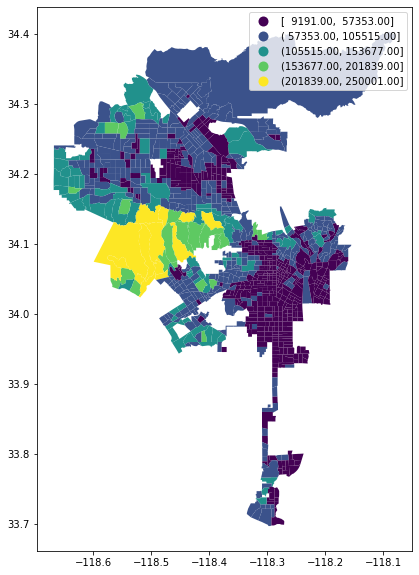

In [182]:
gdf_income.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='equal_interval')

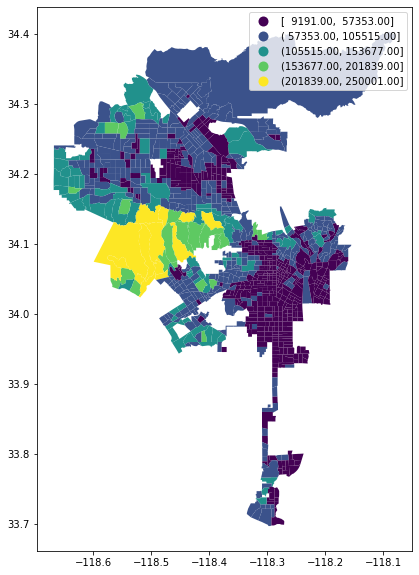

In [183]:
m2w_income_race.plot(figsize=(12,10),
                 column='Median Income',
                 legend=True, 
                 scheme='equal_interval')   

So it's not mapping specific columns. Not sure what the problem is. 

Great. Time for some exploring.

# Exploring Neighborhoods

Purpose is to query nbhoods, define new variables, find missing tracts

## Lay of the Land: Missing Tracts

In [184]:
m2w_income_race.head()

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,N_Asian,N_Native Hawaiian,Hispanic or Latino,%N_White,%N_Black,%N_Native,%N_Asian,%N_Hawaiian,%Hispanic,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,331.0,3.0,1188.0,61.08,0.44,0.07,7.73,0.07,27.74,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,220.0,0.0,147.0,84.64,2.17,0.44,6.46,0.00,4.32,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,486.0,0.0,2616.0,47.05,3.12,0.00,7.66,0.00,41.22,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,341.0,0.0,1364.0,48.95,2.35,0.00,9.21,0.00,36.84,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",Tujunga,81776.0,1782.0,1538.0,1457.0,81.0,26.0,26.0,...,194.0,0.0,297.0,80.48,5.28,0.00,4.99,0.00,7.65,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [185]:
m2w_income_race.columns.to_list()

['geoid',
 'name',
 'Neighborhood',
 'Median Income',
 'Total Workers Commuting',
 'Car Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail',
 'Worked from home',
 '%Car Total',
 '%Drove alone',
 '%Carpooled',
 '%Public transportation',
 '%Bus',
 '%Subway or elevated il',
 '%Long-distance train or commuter rail',
 '%Light rail',
 '%Worked from home',
 'Total Pop Race',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native Hawaiian',
 'Hispanic or Latino',
 '%N_White',
 '%N_Black',
 '%N_Native',
 '%N_Asian',
 '%N_Hawaiian',
 '%Hispanic',
 'geometry']

In [186]:
m2w_income_race[m2w_income_race['%Public transportation']>20]

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,N_Asian,N_Native Hawaiian,Hispanic or Latino,%N_White,%N_Black,%N_Native,%N_Asian,%N_Hawaiian,%Hispanic,geometry
133,14000US06037119340,"Census Tract 1193.40, Los Angeles, CA",Panorama City,30817.0,1805.0,1203.0,953.0,250.0,371.0,367.0,...,103.0,0.0,3999.0,0.09,3.71,0.00,2.42,0.00,93.79,"MULTIPOLYGON (((-118.45355 34.23315, -118.4535..."
142,14000US06037120030,"Census Tract 1200.30, Los Angeles, CA",Panorama City,30625.0,1187.0,800.0,613.0,187.0,277.0,267.0,...,168.0,0.0,2342.0,3.15,2.70,0.00,6.30,0.00,87.85,"MULTIPOLYGON (((-118.45529 34.21791, -118.4544..."
143,14000US06037120103,"Census Tract 1201.03, Los Angeles, CA",Panorama City,26875.0,1290.0,827.0,615.0,212.0,309.0,309.0,...,100.0,0.0,3236.0,1.83,1.54,0.00,2.90,0.00,93.74,"MULTIPOLYGON (((-118.45355 34.22826, -118.4535..."
146,14000US06037120106,"Census Tract 1201.06, Los Angeles, CA",Panorama City,36217.0,2152.0,1476.0,1231.0,245.0,437.0,437.0,...,727.0,0.0,3834.0,2.71,1.53,0.00,15.26,0.00,80.50,"MULTIPOLYGON (((-118.45985 34.22409, -118.4597..."
373,14000US06037183810,"Census Tract 1838.10, Los Angeles, CA",Highland Park,59906.0,2068.0,1342.0,1152.0,190.0,458.0,335.0,...,151.0,0.0,3353.0,13.14,1.49,0.41,3.63,0.00,80.54,"MULTIPOLYGON (((-118.20374 34.10718, -118.2024..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,14000US06037231900,"Census Tract 2319, Los Angeles, CA",South Park,33958.0,2438.0,1570.0,1459.0,111.0,568.0,568.0,...,16.0,0.0,5308.0,0.39,10.47,0.50,0.26,0.00,86.14,"MULTIPOLYGON (((-118.28098 34.00377, -118.2805..."
774,14000US06037237710,"Census Tract 2377.10, Los Angeles, CA",Vermont Knolls,36029.0,1846.0,1388.0,1086.0,302.0,386.0,386.0,...,0.0,0.0,3530.0,0.52,17.12,0.68,0.00,0.00,80.05,"MULTIPOLYGON (((-118.29155 33.97462, -118.2914..."
785,14000US06037239202,"Census Tract 2392.02, Los Angeles, CA",Florence,42609.0,2479.0,1835.0,1591.0,244.0,524.0,524.0,...,0.0,0.0,5495.0,0.12,7.05,0.68,0.00,0.00,91.60,"MULTIPOLYGON (((-118.27393 33.98333, -118.2739..."
817,14000US06037242100,"Census Tract 2421, Los Angeles, CA",Watts,18177.0,707.0,523.0,451.0,72.0,173.0,130.0,...,0.0,39.0,2161.0,0.14,22.72,0.00,0.00,1.37,75.77,"MULTIPOLYGON (((-118.23675 33.94491, -118.2367..."


Of the 9 I'm missing, 3 of those missing have 20% or higher

In [187]:
m2w_income_race[m2w_income_race['%Bus']>20]

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,N_Asian,N_Native Hawaiian,Hispanic or Latino,%N_White,%N_Black,%N_Native,%N_Asian,%N_Hawaiian,%Hispanic,geometry
133,14000US06037119340,"Census Tract 1193.40, Los Angeles, CA",Panorama City,30817.0,1805.0,1203.0,953.0,250.0,371.0,367.0,...,103.0,0.0,3999.0,0.09,3.71,0.00,2.42,0.0,93.79,"MULTIPOLYGON (((-118.45355 34.23315, -118.4535..."
142,14000US06037120030,"Census Tract 1200.30, Los Angeles, CA",Panorama City,30625.0,1187.0,800.0,613.0,187.0,277.0,267.0,...,168.0,0.0,2342.0,3.15,2.70,0.00,6.30,0.0,87.85,"MULTIPOLYGON (((-118.45529 34.21791, -118.4544..."
143,14000US06037120103,"Census Tract 1201.03, Los Angeles, CA",Panorama City,26875.0,1290.0,827.0,615.0,212.0,309.0,309.0,...,100.0,0.0,3236.0,1.83,1.54,0.00,2.90,0.0,93.74,"MULTIPOLYGON (((-118.45355 34.22826, -118.4535..."
146,14000US06037120106,"Census Tract 1201.06, Los Angeles, CA",Panorama City,36217.0,2152.0,1476.0,1231.0,245.0,437.0,437.0,...,727.0,0.0,3834.0,2.71,1.53,0.00,15.26,0.0,80.50,"MULTIPOLYGON (((-118.45985 34.22409, -118.4597..."
424,14000US06037190901,"Census Tract 1909.01, Los Angeles, CA",Hollywood,38140.0,2511.0,1820.0,1706.0,114.0,549.0,534.0,...,163.0,0.0,3568.0,9.31,6.89,0.00,3.55,0.0,77.79,"MULTIPOLYGON (((-118.31578 34.09806, -118.3147..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14000US06037231800,"Census Tract 2318, Los Angeles, CA",Historic South-Central,36765.0,2453.0,1587.0,1204.0,383.0,590.0,540.0,...,0.0,0.0,5049.0,0.00,4.38,0.00,0.00,0.0,92.88,"MULTIPOLYGON (((-118.28097 34.00408, -118.2809..."
736,14000US06037231900,"Census Tract 2319, Los Angeles, CA",South Park,33958.0,2438.0,1570.0,1459.0,111.0,568.0,568.0,...,16.0,0.0,5308.0,0.39,10.47,0.50,0.26,0.0,86.14,"MULTIPOLYGON (((-118.28098 34.00377, -118.2805..."
774,14000US06037237710,"Census Tract 2377.10, Los Angeles, CA",Vermont Knolls,36029.0,1846.0,1388.0,1086.0,302.0,386.0,386.0,...,0.0,0.0,3530.0,0.52,17.12,0.68,0.00,0.0,80.05,"MULTIPOLYGON (((-118.29155 33.97462, -118.2914..."
785,14000US06037239202,"Census Tract 2392.02, Los Angeles, CA",Florence,42609.0,2479.0,1835.0,1591.0,244.0,524.0,524.0,...,0.0,0.0,5495.0,0.12,7.05,0.68,0.00,0.0,91.60,"MULTIPOLYGON (((-118.27393 33.98333, -118.2739..."


Missing 1 census tract.

In [188]:
m2w_income_race[m2w_income_race['%Subway or elevated il']>5]

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,N_Asian,N_Native Hawaiian,Hispanic or Latino,%N_White,%N_Black,%N_Native,%N_Asian,%N_Hawaiian,%Hispanic,geometry
192,14000US06037124103,"Census Tract 1241.03, Los Angeles, CA",North Hollywood,43787.0,877.0,766.0,654.0,112.0,76.0,13.0,...,139.0,0.0,1274.0,24.36,2.00,0.00,7.13,0.00,65.33,"MULTIPOLYGON (((-118.38778 34.19030, -118.3866..."
194,14000US06037124105,"Census Tract 1241.05, Los Angeles, CA",North Hollywood,45764.0,1244.0,1016.0,970.0,46.0,97.0,34.0,...,129.0,0.0,1435.0,32.35,3.19,0.51,5.08,0.00,56.54,"MULTIPOLYGON (((-118.38778 34.18304, -118.3855..."
203,14000US06037124902,"Census Tract 1249.02, Los Angeles, CA",Valley Village,31852.0,1301.0,1065.0,969.0,96.0,166.0,82.0,...,154.0,0.0,524.0,56.91,12.71,0.00,5.69,0.00,19.36,"MULTIPOLYGON (((-118.40525 34.17213, -118.4031..."
208,14000US06037125320,"Census Tract 1253.20, Los Angeles, CA",North Hollywood,39977.0,3054.0,2254.0,2168.0,86.0,345.0,133.0,...,597.0,0.0,1420.0,49.47,6.19,0.92,11.69,0.00,27.81,"MULTIPOLYGON (((-118.37897 34.16544, -118.3789..."
209,14000US06037125401,"Census Tract 1254.01, Los Angeles, CA",North Hollywood,62934.0,3443.0,2775.0,2681.0,94.0,253.0,49.0,...,603.0,8.0,928.0,52.58,14.56,0.00,12.14,0.16,18.69,"MULTIPOLYGON (((-118.37898 34.16490, -118.3774..."
348,14000US06037143604,"Census Tract 1436.04, Los Angeles, CA",Studio City,82199.0,2492.0,1825.0,1666.0,159.0,219.0,60.0,...,711.0,0.0,246.0,57.10,9.22,1.40,19.11,0.00,6.61,"MULTIPOLYGON (((-118.37896 34.14096, -118.3784..."
359,14000US06037183103,"Census Tract 1831.03, Los Angeles, CA",Highland Park,61719.0,2368.0,1810.0,1520.0,290.0,427.0,257.0,...,396.0,0.0,2914.0,13.25,6.13,1.81,9.09,0.00,66.91,"MULTIPOLYGON (((-118.18208 34.11321, -118.1820..."
369,14000US06037183610,"Census Tract 1836.10, Los Angeles, CA",Highland Park,57727.0,1535.0,1180.0,1008.0,172.0,196.0,68.0,...,286.0,12.0,2382.0,12.19,0.65,0.31,8.90,0.37,74.09,"MULTIPOLYGON (((-118.19796 34.11446, -118.1977..."
375,14000US06037185100,"Census Tract 1851, Los Angeles, CA",Mount Washington,109886.0,3684.0,2784.0,2682.0,102.0,329.0,91.0,...,803.0,0.0,2655.0,36.52,3.57,0.00,13.23,0.00,43.74,"MULTIPOLYGON (((-118.22198 34.10852, -118.2216..."
411,14000US06037189904,"Census Tract 1899.04, Los Angeles, CA",Hollywood,49960.0,1738.0,1318.0,1308.0,10.0,174.0,82.0,...,119.0,1.0,453.0,62.05,8.71,0.00,4.89,0.04,18.60,"MULTIPOLYGON (((-118.34895 34.09981, -118.3489..."


Missing no census tracts.

.

In [189]:
m2w_income_race[m2w_income_race['%Long-distance train or commuter rail']>3]

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,N_Asian,N_Native Hawaiian,Hispanic or Latino,%N_White,%N_Black,%N_Native,%N_Asian,%N_Hawaiian,%Hispanic,geometry
18,14000US06037104124,"Census Tract 1041.24, Los Angeles, CA",Tujunga Canyons,77885.0,1556.0,1350.0,1129.0,221.0,70.0,21.0,...,323.0,0.0,1728.0,31.59,12.67,0.57,8.34,0.00,44.59,"MULTIPOLYGON (((-118.39181 34.27762, -118.3916..."
597,14000US06037212102,"Census Tract 2121.02, Los Angeles, CA",Koreatown,27167.0,1096.0,613.0,568.0,45.0,287.0,189.0,...,946.0,39.0,628.0,11.74,15.89,0.83,41.29,1.70,27.41,"MULTIPOLYGON (((-118.30036 34.06235, -118.3003..."
661,14000US06037219300,"Census Tract 2193, Los Angeles, CA",Jefferson Park,43103.0,2015.0,1579.0,1505.0,74.0,290.0,180.0,...,230.0,52.0,2532.0,5.10,27.08,0.00,5.43,1.23,59.73,"MULTIPOLYGON (((-118.33510 34.03258, -118.3337..."
729,14000US06037231300,"Census Tract 2313, Los Angeles, CA",Exposition Park,49803.0,3046.0,2417.0,2171.0,246.0,479.0,314.0,...,241.0,0.0,4079.0,4.19,18.46,0.00,4.19,0.00,70.89,"MULTIPOLYGON (((-118.30891 34.01188, -118.3089..."
762,14000US06037236203,"Census Tract 2362.03, Los Angeles, CA",Baldwin Hills/Crenshaw,30144.0,1423.0,1061.0,998.0,63.0,278.0,131.0,...,224.0,0.0,889.0,3.72,54.84,1.09,7.18,0.00,28.51,"MULTIPOLYGON (((-118.35170 34.02151, -118.3485..."
763,14000US06037236204,"Census Tract 2362.04, Los Angeles, CA",Baldwin Hills/Crenshaw,23677.0,1354.0,1054.0,993.0,61.0,207.0,146.0,...,22.0,11.0,1303.0,4.60,50.40,0.32,0.71,0.35,41.91,"MULTIPOLYGON (((-118.35163 34.01189, -118.3514..."


Missing one census tract: 14000US06037104124

Adding biking and walking, as there may be a correlation to transit friendly areas.

In [190]:
m2w_income_race[m2w_income_race['%Light rail']>2]

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,N_Asian,N_Native Hawaiian,Hispanic or Latino,%N_White,%N_Black,%N_Native,%N_Asian,%N_Hawaiian,%Hispanic,geometry
371,14000US06037183701,"Census Tract 1837.01, Los Angeles, CA",Highland Park,48654.0,2243.0,1638.0,1398.0,240.0,420.0,180.0,...,362.0,17.0,2397.0,20.48,1.80,0.56,9.73,0.46,64.44,"MULTIPOLYGON (((-118.19266 34.10966, -118.1920..."
372,14000US06037183702,"Census Tract 1837.02, Los Angeles, CA",Montecito Heights,62778.0,1489.0,1311.0,1141.0,170.0,81.0,7.0,...,348.0,0.0,1635.0,17.59,5.51,0.00,12.54,0.00,58.92,"MULTIPOLYGON (((-118.19121 34.10124, -118.1899..."
561,14000US06037208903,"Census Tract 2089.03, Los Angeles, CA",Westlake,31731.0,2326.0,867.0,534.0,333.0,1123.0,973.0,...,138.0,0.0,3593.0,4.72,6.79,0.14,3.18,0.00,82.69,"MULTIPOLYGON (((-118.27588 34.05793, -118.2748..."
735,14000US06037231800,"Census Tract 2318, Los Angeles, CA",Historic South-Central,36765.0,2453.0,1587.0,1204.0,383.0,590.0,540.0,...,0.0,0.0,5049.0,0.00,4.38,0.00,0.00,0.00,92.88,"MULTIPOLYGON (((-118.28097 34.00408, -118.2809..."
759,14000US06037236000,"Census Tract 2360, Los Angeles, CA",Baldwin Hills/Crenshaw,90790.0,2219.0,1691.0,1572.0,119.0,157.0,36.0,...,156.0,0.0,642.0,26.79,47.00,0.88,3.73,0.00,15.36,"MULTIPOLYGON (((-118.37967 34.01931, -118.3789..."
795,14000US06037239801,"Census Tract 2398.01, Los Angeles, CA",Florence,46938.0,1485.0,1319.0,1030.0,289.0,123.0,91.0,...,5.0,0.0,2915.0,0.11,20.13,0.00,0.13,0.00,78.68,"MULTIPOLYGON (((-118.26952 33.96737, -118.2684..."
819,14000US06037242300,"Census Tract 2423, Los Angeles, CA",Watts,26515.0,1535.0,1193.0,1100.0,93.0,201.0,132.0,...,203.0,10.0,3663.0,0.40,15.59,2.61,4.10,0.20,73.97,"MULTIPOLYGON (((-118.24913 33.94427, -118.2491..."
820,14000US06037242600,"Census Tract 2426, Los Angeles, CA",Watts,16586.0,1269.0,1018.0,934.0,84.0,188.0,154.0,...,0.0,0.0,3044.0,0.06,34.15,0.00,0.00,0.00,64.00,"MULTIPOLYGON (((-118.25425 33.93097, -118.2542..."
882,14000US06037269906,"Census Tract 2699.06, Los Angeles, CA",Palms,95542.0,2340.0,1795.0,1737.0,58.0,275.0,154.0,...,636.0,77.0,800.0,42.02,5.89,0.44,20.14,2.44,25.33,"MULTIPOLYGON (((-118.40628 34.02548, -118.4052..."


Lost no Light rail census tracts

## Digging a little deeper into each higher transit neighborhoods

A little trimming to identify neighborhoods

### Public Transit

In [191]:
nbh_pt20 = m2w_income_race[m2w_income_race['%Public transportation']>20]

In [192]:
nbh_pt20.tail()

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,N_Asian,N_Native Hawaiian,Hispanic or Latino,%N_White,%N_Black,%N_Native,%N_Asian,%N_Hawaiian,%Hispanic,geometry
736,14000US06037231900,"Census Tract 2319, Los Angeles, CA",South Park,33958.0,2438.0,1570.0,1459.0,111.0,568.0,568.0,...,16.0,0.0,5308.0,0.39,10.47,0.50,0.26,0.00,86.14,"MULTIPOLYGON (((-118.28098 34.00377, -118.2805..."
774,14000US06037237710,"Census Tract 2377.10, Los Angeles, CA",Vermont Knolls,36029.0,1846.0,1388.0,1086.0,302.0,386.0,386.0,...,0.0,0.0,3530.0,0.52,17.12,0.68,0.00,0.00,80.05,"MULTIPOLYGON (((-118.29155 33.97462, -118.2914..."
785,14000US06037239202,"Census Tract 2392.02, Los Angeles, CA",Florence,42609.0,2479.0,1835.0,1591.0,244.0,524.0,524.0,...,0.0,0.0,5495.0,0.12,7.05,0.68,0.00,0.00,91.60,"MULTIPOLYGON (((-118.27393 33.98333, -118.2739..."
817,14000US06037242100,"Census Tract 2421, Los Angeles, CA",Watts,18177.0,707.0,523.0,451.0,72.0,173.0,130.0,...,0.0,39.0,2161.0,0.14,22.72,0.00,0.00,1.37,75.77,"MULTIPOLYGON (((-118.23675 33.94491, -118.2367..."
987,14000US06037701100,"Census Tract 7011, Los Angeles, CA",Veterans Administration,45536.0,120.0,30.0,28.0,2.0,30.0,30.0,...,106.0,0.0,292.0,36.78,22.43,0.00,9.63,0.00,26.52,"MULTIPOLYGON (((-118.46889 34.06587, -118.4687..."


In [193]:
nbh_pt20['Neighborhood'].value_counts()

Westlake                   23
Koreatown                  18
Pico-Union                 13
East Hollywood              9
Historic South-Central      6
Hollywood                   5
Downtown                    5
Panorama City               4
Harvard Heights             3
Boyle Heights               2
Vermont Square              2
Central-Alameda             2
Exposition Park             2
Vermont Knolls              1
South Park                  1
University Park             1
Veterans Administration     1
Highland Park               1
Los Feliz                   1
Florence                    1
Echo Park                   1
Adams-Normandie             1
Chinatown                   1
Watts                       1
Name: Neighborhood, dtype: int64

In [194]:
nbh_pt20_count = nbh_pt20['Neighborhood'].value_counts()
nbh_pt20_count

Westlake                   23
Koreatown                  18
Pico-Union                 13
East Hollywood              9
Historic South-Central      6
Hollywood                   5
Downtown                    5
Panorama City               4
Harvard Heights             3
Boyle Heights               2
Vermont Square              2
Central-Alameda             2
Exposition Park             2
Vermont Knolls              1
South Park                  1
University Park             1
Veterans Administration     1
Highland Park               1
Los Feliz                   1
Florence                    1
Echo Park                   1
Adams-Normandie             1
Chinatown                   1
Watts                       1
Name: Neighborhood, dtype: int64

In [195]:
nbh_pt20_count = nbh_pt20_count.reset_index()
nbh_pt20_count

,index,Neighborhood
0,Westlake,23
1,Koreatown,18
2,Pico-Union,13
3,East Hollywood,9
4,Historic South-Central,6
5,Hollywood,5
6,Downtown,5
7,Panorama City,4
8,Harvard Heights,3
9,Boyle Heights,2


### Bus

In [196]:
nbh_bus20 = m2w_income_race[m2w_income_race['%Bus']>20]

In [197]:
nbh_bus20.sample(5)

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,N_Asian,N_Native Hawaiian,Hispanic or Latino,%N_White,%N_Black,%N_Native,%N_Asian,%N_Hawaiian,%Hispanic,geometry
692,14000US06037224010,"Census Tract 2240.10, Los Angeles, CA",Downtown,28082.0,1593.0,733.0,577.0,156.0,518.0,432.0,...,266.0,0.0,1639.0,13.85,17.64,0.00,9.35,0.00,57.61,"MULTIPOLYGON (((-118.27388 34.03823, -118.2738..."
701,14000US06037226001,"Census Tract 2260.01, Los Angeles, CA",Downtown,34808.0,1190.0,484.0,406.0,78.0,399.0,390.0,...,0.0,0.0,2189.0,0.38,15.56,0.34,0.00,0.00,83.71,"MULTIPOLYGON (((-118.26218 34.02861, -118.2616..."
672,14000US06037221220,"Census Tract 2212.20, Los Angeles, CA",Pico-Union,43611.0,1825.0,1153.0,960.0,193.0,503.0,503.0,...,271.0,0.0,2981.0,3.29,0.39,0.00,8.03,0.00,88.30,"MULTIPOLYGON (((-118.30075 34.04248, -118.3007..."
595,14000US06037211922,"Census Tract 2119.22, Los Angeles, CA",Koreatown,49554.0,1916.0,1149.0,1044.0,105.0,494.0,439.0,...,1450.0,9.0,1342.0,5.75,7.07,1.25,44.36,0.28,41.05,"MULTIPOLYGON (((-118.29665 34.06903, -118.2954..."
709,14000US06037228210,"Census Tract 2282.10, Los Angeles, CA",Central-Alameda,35969.0,1714.0,1122.0,921.0,201.0,355.0,350.0,...,78.0,0.0,3838.0,0.33,6.17,0.99,1.84,0.00,90.67,"MULTIPOLYGON (((-118.25651 34.01360, -118.2541..."


In [198]:
nbh_bus20['Neighborhood'].value_counts()

Westlake                   23
Koreatown                  14
Pico-Union                 13
East Hollywood              7
Historic South-Central      6
Panorama City               4
Harvard Heights             3
Hollywood                   3
Downtown                    3
Vermont Square              2
Boyle Heights               2
Central-Alameda             2
Veterans Administration     1
Exposition Park             1
University Park             1
Vermont Knolls              1
South Park                  1
Adams-Normandie             1
Florence                    1
Name: Neighborhood, dtype: int64

### Subway

In [199]:
nbh_sub5 = m2w_income_race[m2w_income_race['%Subway or elevated il']>5]

In [200]:
nbh_sub5

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,N_Asian,N_Native Hawaiian,Hispanic or Latino,%N_White,%N_Black,%N_Native,%N_Asian,%N_Hawaiian,%Hispanic,geometry
192,14000US06037124103,"Census Tract 1241.03, Los Angeles, CA",North Hollywood,43787.0,877.0,766.0,654.0,112.0,76.0,13.0,...,139.0,0.0,1274.0,24.36,2.00,0.00,7.13,0.00,65.33,"MULTIPOLYGON (((-118.38778 34.19030, -118.3866..."
194,14000US06037124105,"Census Tract 1241.05, Los Angeles, CA",North Hollywood,45764.0,1244.0,1016.0,970.0,46.0,97.0,34.0,...,129.0,0.0,1435.0,32.35,3.19,0.51,5.08,0.00,56.54,"MULTIPOLYGON (((-118.38778 34.18304, -118.3855..."
203,14000US06037124902,"Census Tract 1249.02, Los Angeles, CA",Valley Village,31852.0,1301.0,1065.0,969.0,96.0,166.0,82.0,...,154.0,0.0,524.0,56.91,12.71,0.00,5.69,0.00,19.36,"MULTIPOLYGON (((-118.40525 34.17213, -118.4031..."
208,14000US06037125320,"Census Tract 1253.20, Los Angeles, CA",North Hollywood,39977.0,3054.0,2254.0,2168.0,86.0,345.0,133.0,...,597.0,0.0,1420.0,49.47,6.19,0.92,11.69,0.00,27.81,"MULTIPOLYGON (((-118.37897 34.16544, -118.3789..."
209,14000US06037125401,"Census Tract 1254.01, Los Angeles, CA",North Hollywood,62934.0,3443.0,2775.0,2681.0,94.0,253.0,49.0,...,603.0,8.0,928.0,52.58,14.56,0.00,12.14,0.16,18.69,"MULTIPOLYGON (((-118.37898 34.16490, -118.3774..."
348,14000US06037143604,"Census Tract 1436.04, Los Angeles, CA",Studio City,82199.0,2492.0,1825.0,1666.0,159.0,219.0,60.0,...,711.0,0.0,246.0,57.10,9.22,1.40,19.11,0.00,6.61,"MULTIPOLYGON (((-118.37896 34.14096, -118.3784..."
359,14000US06037183103,"Census Tract 1831.03, Los Angeles, CA",Highland Park,61719.0,2368.0,1810.0,1520.0,290.0,427.0,257.0,...,396.0,0.0,2914.0,13.25,6.13,1.81,9.09,0.00,66.91,"MULTIPOLYGON (((-118.18208 34.11321, -118.1820..."
369,14000US06037183610,"Census Tract 1836.10, Los Angeles, CA",Highland Park,57727.0,1535.0,1180.0,1008.0,172.0,196.0,68.0,...,286.0,12.0,2382.0,12.19,0.65,0.31,8.90,0.37,74.09,"MULTIPOLYGON (((-118.19796 34.11446, -118.1977..."
375,14000US06037185100,"Census Tract 1851, Los Angeles, CA",Mount Washington,109886.0,3684.0,2784.0,2682.0,102.0,329.0,91.0,...,803.0,0.0,2655.0,36.52,3.57,0.00,13.23,0.00,43.74,"MULTIPOLYGON (((-118.22198 34.10852, -118.2216..."
411,14000US06037189904,"Census Tract 1899.04, Los Angeles, CA",Hollywood,49960.0,1738.0,1318.0,1308.0,10.0,174.0,82.0,...,119.0,1.0,453.0,62.05,8.71,0.00,4.89,0.04,18.60,"MULTIPOLYGON (((-118.34895 34.09981, -118.3489..."


In [201]:
nbh_sub5['Neighborhood'].value_counts()

Downtown             6
North Hollywood      4
East Hollywood       3
Hollywood            3
Highland Park        2
Montecito Heights    1
Chinatown            1
Koreatown            1
Los Feliz            1
Palms                1
Boyle Heights        1
Valley Village       1
Studio City          1
Westlake             1
Mount Washington     1
Name: Neighborhood, dtype: int64

### Commuter

In [202]:
nbh_commute3 = m2w_income_race[m2w_income_race['%Long-distance train or commuter rail']>3]

In [203]:
nbh_commute3

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,N_Asian,N_Native Hawaiian,Hispanic or Latino,%N_White,%N_Black,%N_Native,%N_Asian,%N_Hawaiian,%Hispanic,geometry
18,14000US06037104124,"Census Tract 1041.24, Los Angeles, CA",Tujunga Canyons,77885.0,1556.0,1350.0,1129.0,221.0,70.0,21.0,...,323.0,0.0,1728.0,31.59,12.67,0.57,8.34,0.00,44.59,"MULTIPOLYGON (((-118.39181 34.27762, -118.3916..."
597,14000US06037212102,"Census Tract 2121.02, Los Angeles, CA",Koreatown,27167.0,1096.0,613.0,568.0,45.0,287.0,189.0,...,946.0,39.0,628.0,11.74,15.89,0.83,41.29,1.70,27.41,"MULTIPOLYGON (((-118.30036 34.06235, -118.3003..."
661,14000US06037219300,"Census Tract 2193, Los Angeles, CA",Jefferson Park,43103.0,2015.0,1579.0,1505.0,74.0,290.0,180.0,...,230.0,52.0,2532.0,5.10,27.08,0.00,5.43,1.23,59.73,"MULTIPOLYGON (((-118.33510 34.03258, -118.3337..."
729,14000US06037231300,"Census Tract 2313, Los Angeles, CA",Exposition Park,49803.0,3046.0,2417.0,2171.0,246.0,479.0,314.0,...,241.0,0.0,4079.0,4.19,18.46,0.00,4.19,0.00,70.89,"MULTIPOLYGON (((-118.30891 34.01188, -118.3089..."
762,14000US06037236203,"Census Tract 2362.03, Los Angeles, CA",Baldwin Hills/Crenshaw,30144.0,1423.0,1061.0,998.0,63.0,278.0,131.0,...,224.0,0.0,889.0,3.72,54.84,1.09,7.18,0.00,28.51,"MULTIPOLYGON (((-118.35170 34.02151, -118.3485..."
763,14000US06037236204,"Census Tract 2362.04, Los Angeles, CA",Baldwin Hills/Crenshaw,23677.0,1354.0,1054.0,993.0,61.0,207.0,146.0,...,22.0,11.0,1303.0,4.60,50.40,0.32,0.71,0.35,41.91,"MULTIPOLYGON (((-118.35163 34.01189, -118.3514..."


In [204]:
nbh_commute3['Neighborhood'].value_counts()

Baldwin Hills/Crenshaw    2
Exposition Park           1
Jefferson Park            1
Tujunga Canyons           1
Koreatown                 1
Name: Neighborhood, dtype: int64

### Light Rail

In [205]:
nbh_lr4 = m2w_income_race[m2w_income_race['%Light rail']>4]

In [206]:
nbh_lr4

,geoid,name,Neighborhood,Median Income,Total Workers Commuting,Car Total,Drove alone,Carpooled,Public transportation,Bus,...,N_Asian,N_Native Hawaiian,Hispanic or Latino,%N_White,%N_Black,%N_Native,%N_Asian,%N_Hawaiian,%Hispanic,geometry
371,14000US06037183701,"Census Tract 1837.01, Los Angeles, CA",Highland Park,48654.0,2243.0,1638.0,1398.0,240.0,420.0,180.0,...,362.0,17.0,2397.0,20.48,1.80,0.56,9.73,0.46,64.44,"MULTIPOLYGON (((-118.19266 34.10966, -118.1920..."
372,14000US06037183702,"Census Tract 1837.02, Los Angeles, CA",Montecito Heights,62778.0,1489.0,1311.0,1141.0,170.0,81.0,7.0,...,348.0,0.0,1635.0,17.59,5.51,0.00,12.54,0.00,58.92,"MULTIPOLYGON (((-118.19121 34.10124, -118.1899..."


**Most Frequenct users of Public Transit:**
* Westlake                  23x
* Koreatown                 18x
* Pico-Union                13x
* East Hollywood             9x
* Historic South-Central     6x
* Downtown                   5x
* Hollywood                  5x
* Panorama City              4x
* Harvard Heights            3x
* Vermont Square             2x
* Boyle Heights              2x
* Central-Alameda            2x
* Exposition Park            2x
* Vermont Knolls             1x
* South Park                 1x
* Florence                   1x
* Echo Park                  1x
* University Park            1x
* Chinatown                  1x
* Adams-Normandie            1x
* Highland Park              1x
* Los Feliz                  1x


**Other Neighborhoods to conisder:**
* North Hollywood (sub)     4x
* East Hollywood (sub)      3x
* Mount Washington (sub)    1x
* Chinatown (sub)           1x
* Studio City  (sub)        1x
* Montecito Heights (sub)   1x
* Palms (sub)               1x
* Valley Village (sub)      1x
* Baldwin Hills/Crenshaw (distance rail)    2x
* Jefferson Park (distance rail)            1x
* Exposition Park   (distance rail)         1

A breakdown by region

**SF Valley**
* Studio City
* North Hollywood
* Panorama City 
* Valley Village 

 
**Westside**
* Palms

**Central LA**
* Hollywood
* East Hollywood 
* Koreatown   
* Westlake  
* Downtown
* Echo Park
* Chinatown
* Harvard Heights
* Pico-Union  
* Los Feliz  

**South LA**
* Historic South-Central
* Vermont Square  
* Vermont Knolls 
* Central-Alameda 
* Exposition Park
* South Park
* Florence   
* University Park
* Adams-Normandie
* Baldwin Hills/Crenshaw
* Jefferson Park
* Exposition Park

**Eastside**
* Boyle Heights  

**Northeast LA**
* Highland Park 
* Mount Washington 
* Montecito Heights 

In [207]:
m2w_income_race.to_file('m2w_income_race_new.geojson')

In [208]:
m2w_income_race_2 = gpd.read_file('m2w_income_race_new.geojson') 

In [209]:
type(m2w_income_race_2)

geopandas.geodataframe.GeoDataFrame

In [210]:
m2w_income_race_2.shape

(1004, 37)

In [211]:
m2w_income_race_2.head(4)

,geoid,name,Neighborho,Median Inc,Total Work,Car Total,Drove alon,Carpooled,Public tra,Bus,...,N_Asian,N_Native H,Hispanic o,%N_White,%N_Black,%N_Native,%N_Asian,%N_Hawaiia,%Hispanic,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",Tujunga,63534.0,2027.0,1860.0,1656.0,204.0,59.0,36.0,...,331.0,3.0,1188.0,61.08,0.44,0.07,7.73,0.07,27.74,"POLYGON ((-118.30229 34.25870, -118.30091 34.2..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",Tujunga,90389.0,1834.0,1730.0,1617.0,113.0,9.0,0.0,...,220.0,0.0,147.0,84.64,2.17,0.44,6.46,0.00,4.32,"POLYGON ((-118.30334 34.27371, -118.30330 34.2..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",Tujunga,44083.0,3057.0,2699.0,2430.0,269.0,68.0,68.0,...,486.0,0.0,2616.0,47.05,3.12,0.00,7.66,0.00,41.22,"POLYGON ((-118.29945 34.25598, -118.29792 34.2..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",Tujunga,43713.0,1593.0,1439.0,1323.0,116.0,48.0,48.0,...,341.0,0.0,1364.0,48.95,2.35,0.00,9.21,0.00,36.84,"POLYGON ((-118.28593 34.25227, -118.28592 34.2..."


In [212]:
m2w_income_race_2.columns.to_list()

['geoid',
 'name',
 'Neighborho',
 'Median Inc',
 'Total Work',
 'Car Total',
 'Drove alon',
 'Carpooled',
 'Public tra',
 'Bus',
 'Subway or',
 'Long-dista',
 'Light rail',
 'Worked fro',
 '%Car Total',
 '%Drove alo',
 '%Carpooled',
 '%Public tr',
 '%Bus',
 '%Subway or',
 '%Long-dist',
 '%Light rai',
 '%Worked fr',
 'Total Pop',
 'N_White',
 'N_Black',
 'N_Native',
 'N_Asian',
 'N_Native H',
 'Hispanic o',
 '%N_White',
 '%N_Black',
 '%N_Native',
 '%N_Asian',
 '%N_Hawaiia',
 '%Hispanic',
 'geometry']